# EDA and ETL for scraped data from IPM and AskExtension data knowledge

In [5]:
'''
['exoticPests.json',
 'fruitItems_new.json',
 'fruitVeggieEnvironItems_new.json',
 'ipmdata_new.json',
 'pestDiseaseItems_new.json',
 'plantFlowerItems.json',
 'turfPests.json',
 'veggieItems_new.json',
 'weedItems.json']
'''
_PATH = '../data/uc-ipm/updated/'
DATA_FILE_NAMES = sorted(os.listdir(_PATH))

In [6]:
import pandas as pd

import json
import os

import matplotlib.pyplot as plt

COLOR = 'white'
plt.rcParams['text.color']      = COLOR
plt.rcParams['text.color']      = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color']     = COLOR
plt.rcParams['ytick.color']     = COLOR

## IPM Data

In [7]:
FILE_NAME = 'ipmdata_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 214 non-null    object
 1   urlPestNote          214 non-null    object
 2   descriptionPestNote  214 non-null    object
 3   life_cycle           214 non-null    object
 4   damagePestNote       214 non-null    object
 5   managementPestNote   214 non-null    object
 6   imagePestNote        214 non-null    object
 7   tablePestNote        214 non-null    object
 8   urlQuickTip          214 non-null    object
 9   contentQuickTips     214 non-null    object
 10  imageQuickTips       214 non-null    object
 11  video                214 non-null    object
dtypes: object(12)
memory usage: 20.2+ KB


In [8]:
df.sample(5)

,name,urlPestNote,descriptionPestNote,life_cycle,damagePestNote,managementPestNote,imagePestNote,tablePestNote,urlQuickTip,contentQuickTips,imageQuickTips,video
16,Hobo Spider,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7488.html...,"The hobo spider, Eratigena agrestis (formerly ...",The hobo spider is a member of the spider fami...,,Because the hobo spider is not known to live i...,"[{'caption': 'Adult hobo spider, Eratigena agr...",[],,,[],[]
3,Bee and Wasp Stings,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7449.html...,Nearly everyone has been stung by an insect at...,,,,"[{'caption': 'Yellowjacket.', 'link': 'http://...",[],,,[],[]
39,Cliff Swallows,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7482.html...,"Swallows, particularly cliff swallows, Hirundo...",,,Actions to solve problems with swallows should...,[{'caption': 'Adult cliff swallows building ne...,"[<table border=""1"" cellpadding=""2"" cellspacing...",,,[],[]
210,Ingredients,,,,,,[],[],,,[],[{'videoLink': 'http://ipm.ucdavis.edu/VIDEO/b...
150,Eye Gnats,http://ipm.ucanr.edu/PMG/PESTNOTES/pn74164.htm...,"Eye gnats, including Hippelates and Liohippela...","Eye gnats are small flies, 1/16 to 1/8 inch lo...",,Control of eye gnats requires an all-encompass...,"[{'caption': 'Eye gnat adult.', 'link': 'http:...",[],,,[],[]


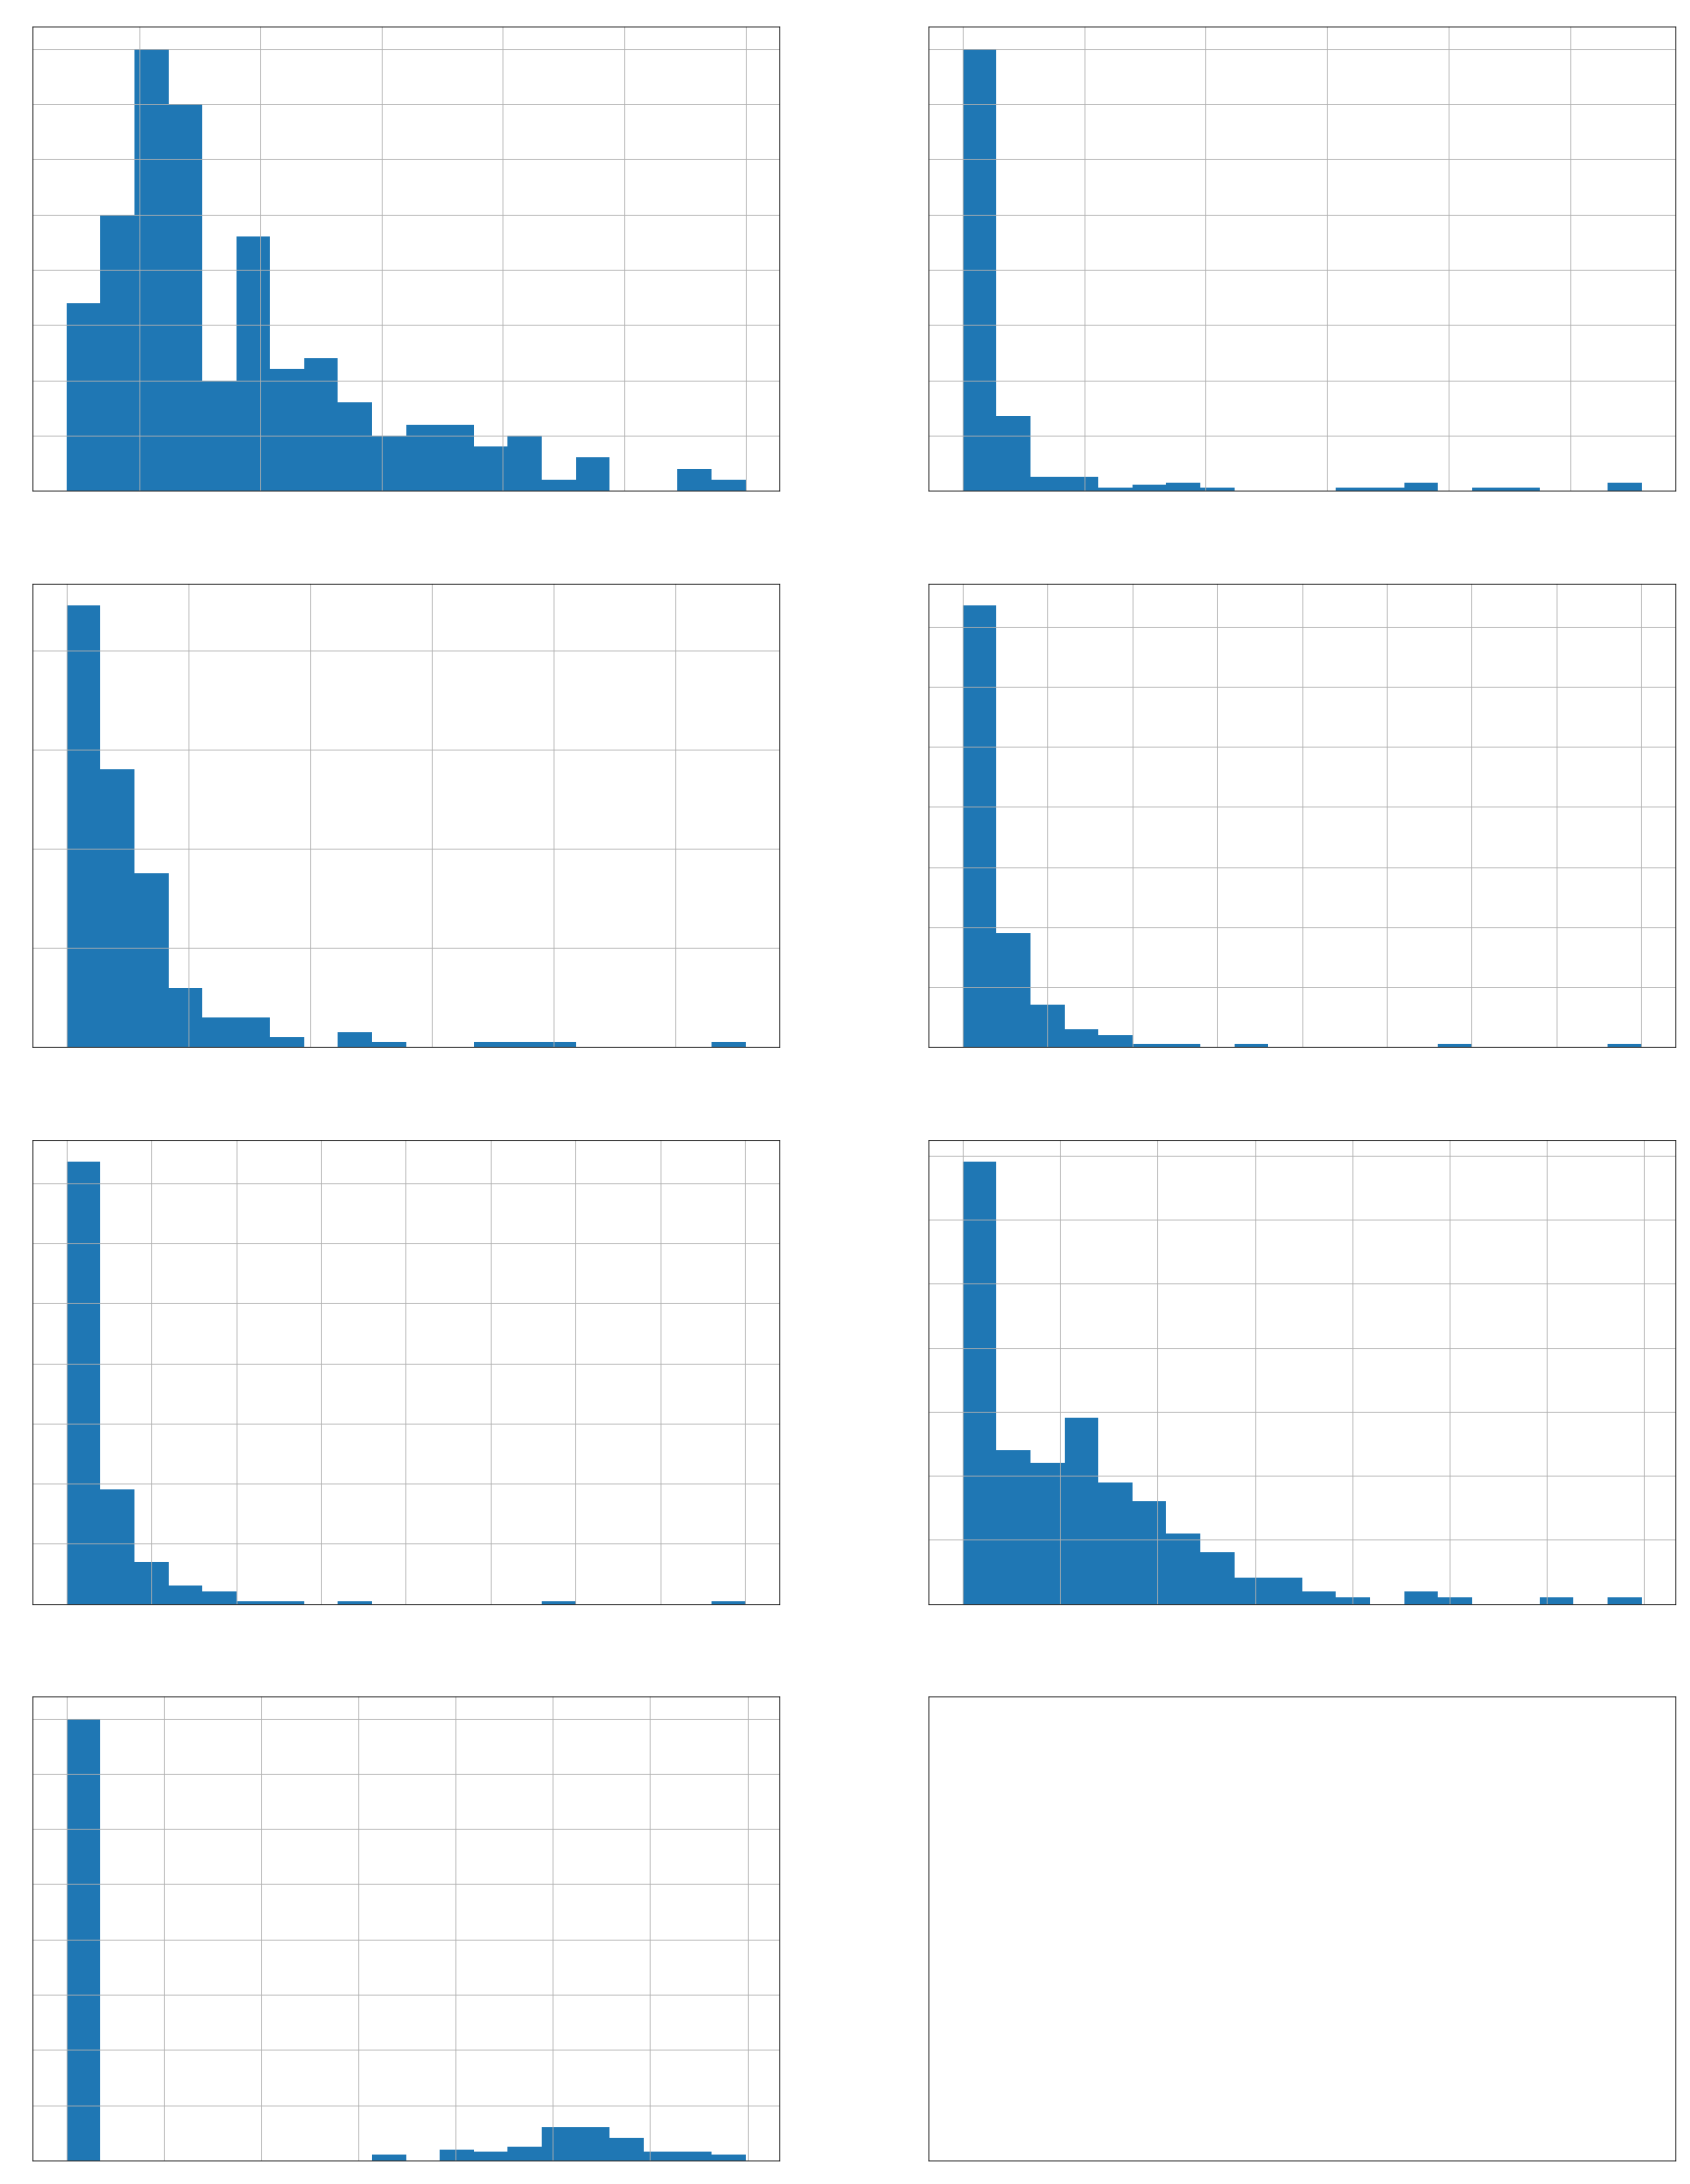

In [9]:
text_columns = ['name', 'descriptionPestNote', 'life_cycle', 'damagePestNote', 'damagePestNote', 'managementPestNote', 'contentQuickTips']
fig, axes = plt.subplots(4, 2, figsize = (30, 40))
for i, col in enumerate(text_columns):
    r = i//2
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Description of columns

Columns:
- `name`
    - Name of the pest
    - create __embedding__
- `damagePestNote`
    - Description of the damage caused by this pest
    - __inject__ into ES, create __embedding__
    - can be used to match by __DAMAGE__
- `imagePestNote`
    - Some images regarding the pest
    - create __embedding__ for captions
- `imageQuickTips`
    - Some addiotinal links to images related to pests (similar to `imagePestNote`)
    - create __embedding__ for captions
- `video`
    - Links to video related to pests
    - create __embedding__ for captions

## Fruit items

In [10]:
FILE_NAME = 'fruitItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 15 non-null     object
 1   url                  15 non-null     object
 2   cultural_tips        14 non-null     object
 3   pests_and_disorders  15 non-null     object
dtypes: object(4)
memory usage: 608.0+ bytes


In [11]:
df.sample(5)

,name,url,cultural_tips,pests_and_disorders
10,Nectarines and Peaches,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/nectarin...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
3,Figs,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/figs.htm...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Ants', 'link': 'http://ipm.ucanr..."
14,Apples,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/apples.h...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Light brown apple moth', 'link':..."
4,Strawberries,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/strawber...,"[{'tip': 'Bed preparation', 'link': 'http://ip...","[{'problem': 'Spotted wing drosophila', 'link'..."
13,Almonds,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/almonds....,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Ants', 'link': 'http://ipm.ucanr..."


In [12]:
print('CULTURAL_TIPS field')
print(json.dumps(df['cultural_tips'][0], indent=4, sort_keys=True))

print('PESTS_AND_DISORDERS field')
print(json.dumps(df['pests_and_disorders'][0], indent=4, sort_keys=True))


CULTURAL_TIPS field
[
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/depbrkcanfert.html?src=exchbt",
        "tip": "Fertilizing"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondfirst.html?src=exchbt",
        "tip": "First-year pruning"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/walnutharvet.html?src=exchbt",
        "tip": "Harvesting and storage"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/walnutplanting.html?src=exchbt",
        "tip": "Planting"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/walnutpruning.html?src=exchbt",
        "tip": "Pruning"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/sanitation.html?src=exchbt",
        "tip": "Sanitation"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondsite.html?src=exchbt",
        "tip": "Site selection"
    },
    {
   

### FOR TIME BEING NOT PROCESSED INTO ES

### TODO
- Create se
- Create separate field with __tips__ keywords
- Create separate field with __problems__ keywords

## Veggie Items

In [13]:
FILE_NAME = 'veggieItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 31 non-null     object
 1   url                  31 non-null     object
 2   description          31 non-null     object
 3   tips                 31 non-null     object
 4   images               31 non-null     object
 5   pests_and_disorders  31 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB


In [14]:
df.sample(5)

,name,url,description,tips,images,pests_and_disorders
28,Corn,http://ipm.ucanr.edu/home-and-landscape/corn/i...,Corn varieties differ significantly in time to...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-CN-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
11,Mint,http://ipm.ucanr.edu/home-and-landscape/mint/i...,Mint is a perennial herb with more than 600 va...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-MI-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
5,Broccoli,http://ipm.ucanr.edu/home-and-landscape/brocco...,"Broccoli, like other crops in the mustard fami...",Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Beet armyworm', 'link': 'http://..."
7,Brussels sprouts,http://ipm.ucanr.edu/home-and-landscape/brusse...,"Brussels sprouts are a hardy, slow-growing, lo...",Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Beet armyworm', 'link': 'http://..."
26,Eggplant,http://ipm.ucanr.edu/home-and-landscape/eggpla...,"Eggplant is a member of the nightshade family,...",Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-EP-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."


### FOR TIME BEING DO NOT PROCESS

### TODO
- Create separate field with __tips__ keyword
- Create separate field with __images_caption__
- Create separate field with __problems__

## Environment Fruit and Veggie

In [11]:
FILE_NAME = 'fruitVeggieEnvironItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  223 non-null    object
 1   url                   223 non-null    object
 2   description           223 non-null    object
 3   identification        223 non-null    object
 4   damage                223 non-null    object
 5   disorder_development  223 non-null    object
 6   solutions             223 non-null    object
 7   images                223 non-null    object
dtypes: object(8)
memory usage: 14.1+ KB


In [12]:
df.sample(5)

,name,url,description,identification,damage,disorder_development,solutions,images
76,Frost,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/...,Frost-damaged leaves or twigs become water-soa...,,,,"Certain cultural practices, such as avoiding p...",[{'link': 'http://ipm.ucanr.edu/PMG/W/A-CI-WEA...
97,Aeration deficit,http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/aerati...,Aeration is the process of air passage though ...,A short-term (acute) aeration deficit (for hou...,,Aeration deficit is especially common in irrig...,"To determine the cause of aeration deficit, as...",[{'link': 'http://ipm.ucanr.edu/PMG/P/A-AV-PHY...
110,Soil properties and water availability to roots,http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/soil.h...,A prolonged deficiency or excess of soil moist...,,,,Learn the characteristics of your soil to help...,[{'link': 'http://ipm.ucanr.edu/PMG/W/A-WO-WSN...
180,Sunscald on beans,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/ENVIRON/...,Sunscald symptoms first appear as small water-...,,,,This condition is caused by exposure to intens...,[{'link': 'http://ipm.ucanr.edu/PMG/W/A-BN-WEA...
121,Mineral deficiencies and toxicities in palms,http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/palmde...,"Certain nutrients, in relatively small amounts...",,,,Provide a good growing environment and proper ...,[{'link': 'http://ipm.ucanr.edu/PMG/M/A-WO-MDE...


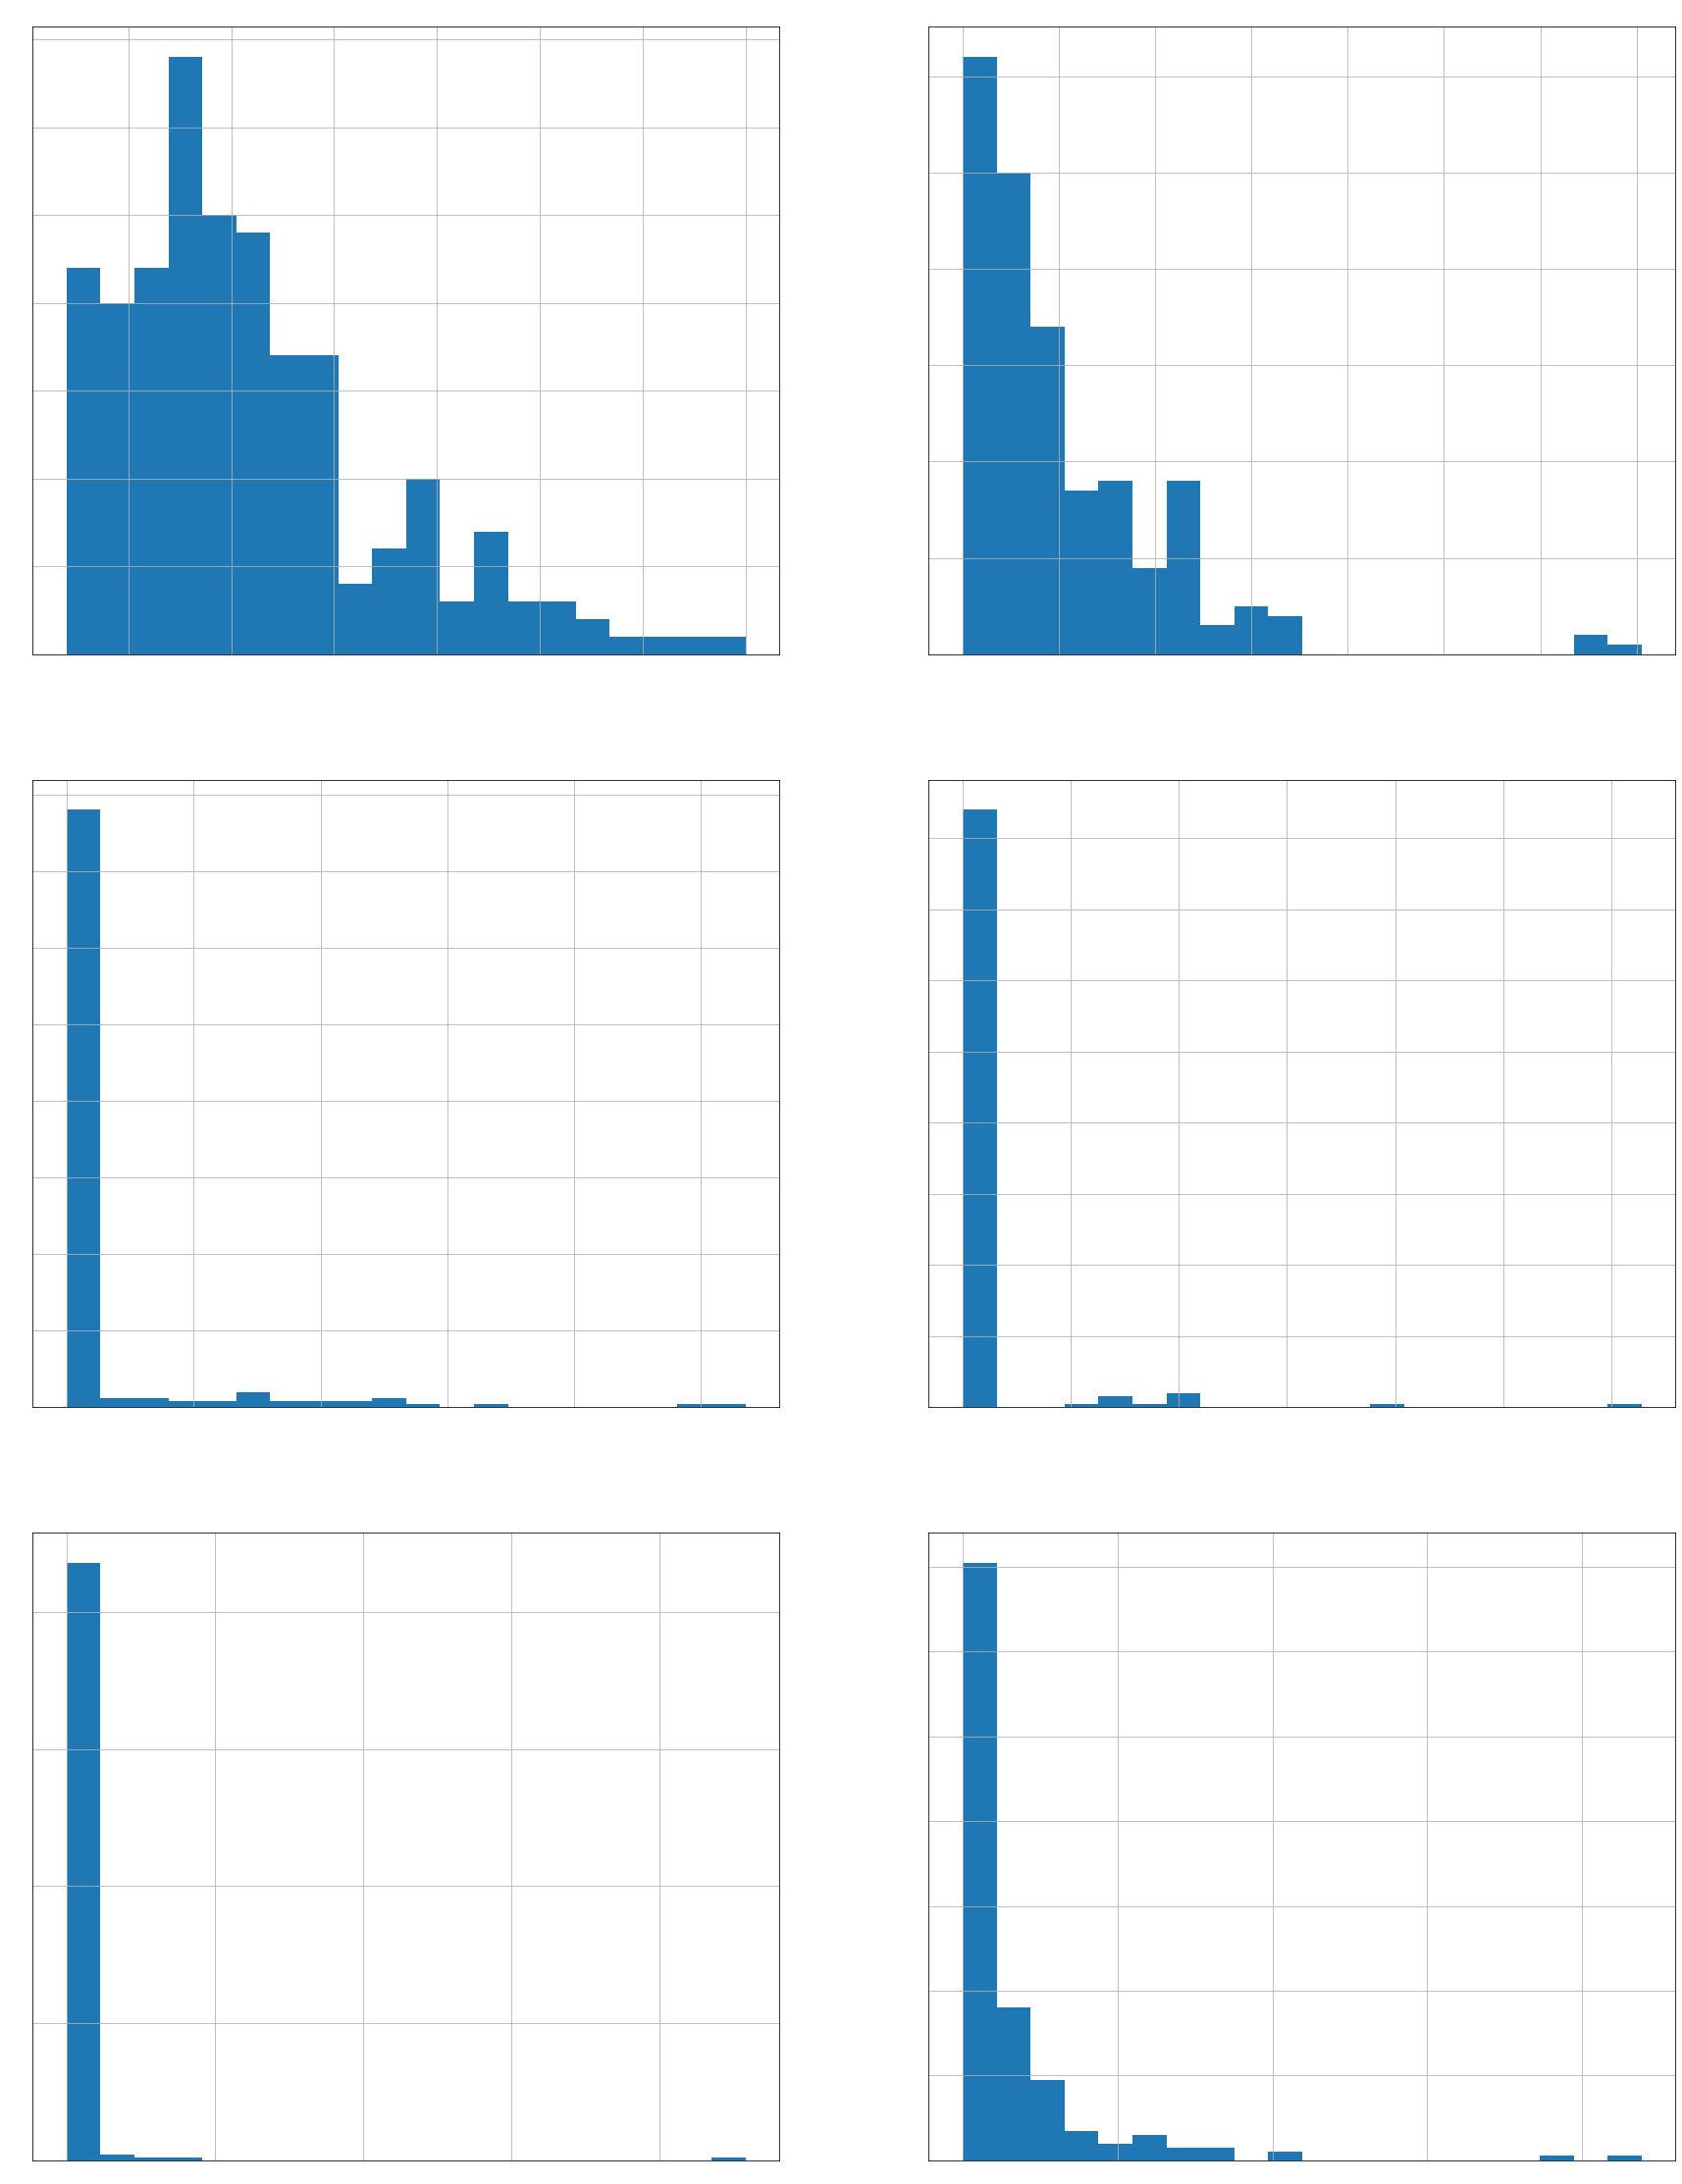

In [13]:
text_columns = ['name', 'description', 'identification', 'damage', 'disorder_development', 'solutions']
fig, axes = plt.subplots(3, 2, figsize = (30, 40))
for i, col in enumerate(text_columns):
    r = i//2
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### TODO
- Create single column out of __name and description__ to be fed by USE (Universal Sentence Encoder)

## Plant items

In [15]:
FILE_NAME = 'plantFlowerItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 186 non-null    object
 1   url                  186 non-null    object
 2   identification       186 non-null    object
 3   optimum_conditions   186 non-null    object
 4   pests_and_disorders  186 non-null    object
 5   images               186 non-null    object
dtypes: object(6)
memory usage: 8.8+ KB


In [16]:
df.sample(5)

,name,url,identification,optimum_conditions,pests_and_disorders,images
156,Fir,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/fir.htm...,"Firs are tall, symmetrical evergreen trees. Br...",Fir trees do best near their natural environme...,"[{'problem': 'Adelgids', 'link': 'http://ipm.u...",[{'link': 'http://ipm.ucanr.edu/PMG/P/S-WO-PIN...
62,Oleander,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/oleande...,Plant identification Oleanders are evergreen s...,Oleanders grow in most climatic zones except f...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca...",[{'link': 'http://ipm.ucanr.edu/PMG/A/S-WO-APO...
51,Pyracantha,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/pyracan...,Plant identification Pyracantha,The climatic zone for Pyracantha varies by spe...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca...",[{'link': 'http://ipm.ucanr.edu/PMG/PESTNOTES/...
64,Spruce,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/spruce....,Plant identification Picea,Spruce can adapt to various climatic zones. Dw...,"[{'problem': 'Adelgids', 'link': 'http://ipm.u...",[{'link': 'http://ipm.ucanr.edu/PMG/P/S-WO-PIC...
110,Coral tree,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/coraltr...,Coral trees are deciduous or nearly evergreen ...,Coral trees are grown primarily in Southern Ca...,"[{'problem': 'Cottony cushion scale', 'link': ...",[{'link': 'http://ipm.ucanr.edu/PMG/F/S-WO-FAB...


### TODO
- Create separate field with __problems__ keywords
- 